In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Layer Definitions

In [2]:
def dense_forward(x, w, b):
    """
    Computes the forward pass for an affine (fully-connected) layer.
    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). We will
    reshape each input into a vector of dimension D = d_1 * ... * d_k, and
    then transform it to an output vector of dimension M.
    Inputs:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)
    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (x, w, b)
    """
    # dimension
    N = x.shape[0]
    D = np.prod(x.shape[1:])
    x2 = np.reshape(x, (N, D))
    out = np.dot(x2, w) + b
    cache = (x, w, b)

    return out, cache

def dense_backward(dout, cache):
    """
    Computes the backward pass for an affine layer.
    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
      - x: Input data, of shape (N, d_1, ... d_k)
      - w: Weights, of shape (D, M)
    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """
    x, w, b = cache
    dx = np.dot(dout, w.T).reshape(x.shape)
    dw = np.dot(x.reshape(x.shape[0], np.prod(x.shape[1:])).T, dout)
    db = np.sum(dout, axis=0)

    return dx, dw, db

In [3]:
def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).
    Input:
    - x: Inputs, of any shape
    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """

    out = np.maximum(0, x)
    cache = x

    return out, cache

def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).
    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout
    Returns:
    - dx: Gradient with respect to x
    """

    x = cache
    dx = np.array(dout, copy=True)
    dx[x <= 0] = 0

    return dx

In [4]:
def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth class
    for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
    0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    probs = np.exp(x - np.max(x, axis=1, keepdims=True))
    probs /= np.sum(probs, axis=1, keepdims=True)
    N = x.shape[0]
    loss = -np.sum(np.log(probs[np.arange(N), y])) / N
    dx = probs.copy()
    dx[np.arange(N), y] -= 1
    dx /= N
    return loss, dx

In [5]:
std = 0.01
input_size = 2
hidden_size = 32
output_size = 2

def gen_weights():
    W1 = std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)
    return(W1, b1, W2, b2)

In [6]:
def gen_data(n=100):
    x = np.random.randn(n, 2)
    y_ = np.product(x, axis=1) > 0
    y = np.array(y_, dtype=np.int8)
    return(x, y)

In [7]:
def predict(x_train):
    hidden_layer, cache_hidden_layer = dense_forward(x_train, W1, b1)
    hidden_relu_layer, cache_relu_layer = relu_forward(hidden_layer)
    scores, cache_scores = dense_forward(hidden_relu_layer, W2, b2)
    return(np.argmax(scores, axis=1))

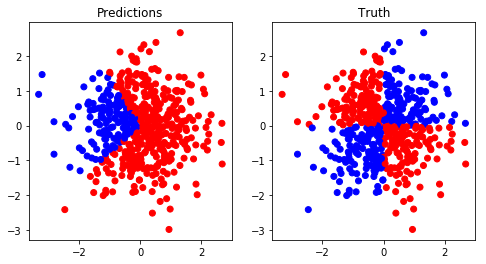

In [8]:
np.random.seed(10)
W1, b1, W2, b2 = gen_weights()
x_test, y_test = gen_data(500)
plt.rcParams['figure.figsize'] = 8, 4
preds = predict(x_test)
plt.subplot(121)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in preds])
plt.title('Predictions')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in y_test])
plt.title('Truth')

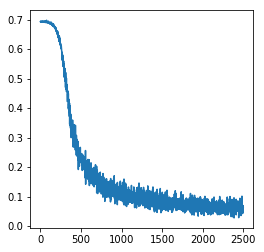

In [9]:
W1, b1, W2, b2 = gen_weights()
alpha = 1e-1
history = []
data_loss = 1000
for _ in range(2500):
#     training_rows = np.random.choice(range(num_inputs), batch_size)
#     x_train, y_train = X[training_rows], y[training_rows]
    x_train, y_train = gen_data()
    
    #############FORWARD PROPAGATION##################################
    hidden_layer, cache_hidden_layer = dense_forward(x_train, W1, b1)
    hidden_relu_layer, cache_relu_layer = relu_forward(hidden_layer)
    scores, cache_scores = dense_forward(hidden_relu_layer, W2, b2)
    data_loss, dscores = softmax_loss(scores, y_train)
    ##################################################################
    
    history.append(data_loss)
    
    #############BACKWARD PROPAGATION#################################
    dx1, dW2, db2 = dense_backward(dscores, cache_scores)
    dx2 = relu_backward(dx1, cache_relu_layer)
    _, dW1, db1 = dense_backward(dx2, cache_hidden_layer)
    ##################################################################
    
    #############WEIGHTS UPDATING#####################################
    W1 -= alpha*dW1
    b1 -= alpha*db1
    W2 -= alpha*dW2
    b2 -= alpha*db2
    ##################################################################
plt.rcParams['figure.figsize'] = 4, 4
plt.plot(history)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
np.random.seed(10)
x_train, y_train = gen_data(10000)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

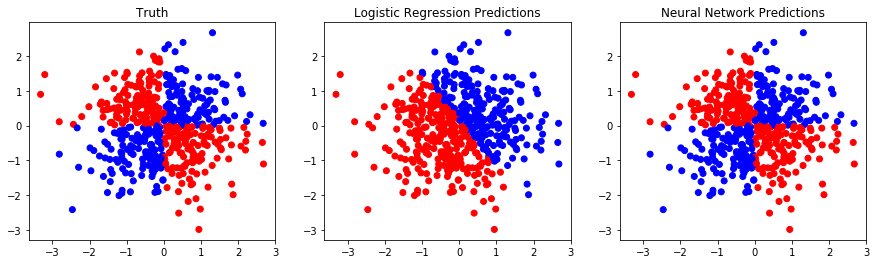

In [11]:
preds = model.predict(x_test)
plt.rcParams['figure.figsize'] = 15, 4
plt.subplot(131)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in y_test])
plt.title('Truth')
plt.subplot(132)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in preds])
plt.title('Logistic Regression Predictions')
preds = predict(x_test)
plt.subplot(133)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in preds])
plt.title('Neural Network Predictions')

## Perceptron(s) Playground
http://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=8,8&seed=0.55588&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false